# Load Packages

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.contingency_tables import mcnemar
import scipy, scipy.stats
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import statsmodels as sm

In [ ]:
from scipy.stats import boxcox

# Load Data

In [2]:
Cancer = pd.read_csv('C:/Users/Aarons/Documents/CancerRename.csv')
Cancer.head()

,Unnamed: 0,Name,Category,State,Race,Count,Poverty%,Insured,Population,NameR
0,1,Cervix Uteri,Female Genital System,Alabama,NativeAmer,0,18.4,89.2,4874747,0
1,2,Cervix Uteri,Female Genital System,Alabama,AfricanAmer,77,18.4,89.2,4874747,0
2,3,Cervix Uteri,Female Genital System,Alabama,Caucasian,152,18.4,89.2,4874747,0
3,4,Corpus Uteri,Female Genital System,Alabama,NativeAmer,0,18.4,89.2,4874747,1
4,5,Corpus Uteri,Female Genital System,Alabama,AfricanAmer,154,18.4,89.2,4874747,1


In [3]:
Cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1075 non-null   int64  
 1   Name        1075 non-null   object 
 2   Category    1075 non-null   object 
 3   State       1075 non-null   object 
 4   Race        1075 non-null   object 
 5   Count       1075 non-null   int64  
 6   Poverty%    1075 non-null   float64
 7   Insured     1075 non-null   float64
 8   Population  1075 non-null   int64  
 9   NameR       1075 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 84.1+ KB


# Data Wrangling

In [5]:
Cancer2 = Cancer.drop(['Unnamed: 0'], axis = 1)

In [6]:
label_encoder =LabelEncoder()

In [7]:
Cancer2['State']= label_encoder.fit_transform(Cancer2['State'])
Cancer2['Name']= label_encoder.fit_transform(Cancer2['Name'])
Cancer2['Race']= label_encoder.fit_transform(Cancer2['Race'])

In [15]:
Cancer2.head()

,Name,State,Count,Poverty%,Population,NameR
0,Cervix Uteri,0,0,18.4,4874747,0
1,Cervix Uteri,0,77,18.4,4874747,0
2,Cervix Uteri,0,152,18.4,4874747,0
3,Corpus Uteri,0,0,18.4,4874747,1
4,Corpus Uteri,0,154,18.4,4874747,1


In [13]:
Cancer2 = Cancer.drop(['Category', 'Insured', 'Unnamed: 0', 'Race'], axis = 1)

In [14]:
Cancer2['State']= label_encoder.fit_transform(Cancer2['State'])

# Test Assumptions

## Single Sample t-Test

<AxesSubplot:>

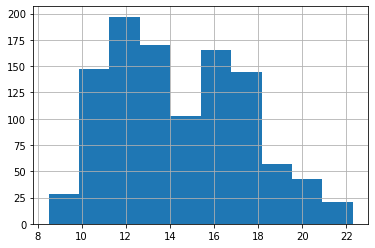

In [17]:
Cancer2['Poverty%'].hist()

<AxesSubplot:>

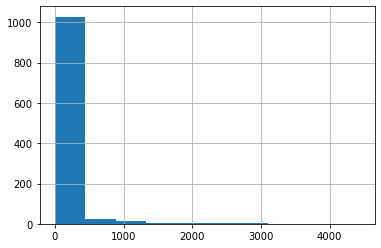

In [18]:
Cancer2['Count'].hist()

<AxesSubplot:>

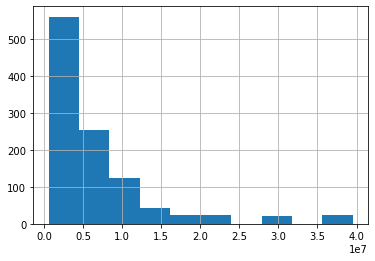

In [19]:
Cancer2['Population'].hist()

### Run the Analysis

In [21]:
stats.ttest_1samp(Cancer2['Poverty%'], 25000)

Ttest_1sampResult(statistic=-262823.9738441351, pvalue=0.0)

In [22]:
stats.ttest_1samp(Cancer2['Count'], 25000)

Ttest_1sampResult(statistic=-2785.88054228928, pvalue=0.0)

In [23]:
stats.ttest_1samp(Cancer2['Population'], 25000)

Ttest_1sampResult(statistic=27.96522641780044, pvalue=9.763783558914398e-130)

## Dependent t-Test

### Test Assumptions

In [24]:
stats.ttest_rel(Cancer2['Poverty%'], Cancer2['Count'])

Ttest_relResult(statistic=-8.238048557199075, pvalue=5.049321572096361e-16)

In [25]:
stats.ttest_rel(Cancer2['Poverty%'], Cancer2['Population'])

Ttest_relResult(statistic=-28.074265323811986, pvalue=1.66768865503652e-130)

In [26]:
stats.ttest_rel(Cancer2['Population'], Cancer2['Count'])

Ttest_relResult(statistic=28.074287254761654, pvalue=1.6670958141188884e-130)

## Independent Chi-Square

### Test Assumptions

#### Create a Contingency Table

In [28]:
Cancer2_crosstab = pd.crosstab(Cancer2['Poverty%'], Cancer2['Count'])
Cancer2_crosstab.head()

Count,0,16,17,18,19,20,21,22,23,24,...,1466,1582,1926,1973,2028,2555,2571,2775,3032,4430
Poverty%,,,,,,,,,,,,,,,,,,,,,
8.5,23,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9.9,9,0,4,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
10.1,17,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.4,12,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10.8,23,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
Cancer3_crosstab = pd.crosstab(Cancer2['Poverty%'], Cancer2['Population'])
Cancer3_crosstab.head()

Population,579315,623657,693972,739795,755393,869666,961939,1050493,1059639,1335907,...,9962311,10273419,10429379,11658609,12802023,12805537,19849399,20984400,28304596,39536653
Poverty%,,,,,,,,,,,,,,,,,,,,,
8.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1,0,0,0,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
Cancer4_crosstab = pd.crosstab(Cancer2['Population'], Cancer2['Count'])
Cancer4_crosstab.head()

Count,0,16,17,18,19,20,21,22,23,24,...,1466,1582,1926,1973,2028,2555,2571,2775,3032,4430
Population,,,,,,,,,,,,,,,,,,,,,
579315,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
623657,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
693972,15,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
739795,17,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
755393,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Running the Independent Chi-Square

In [31]:
stats.chi2_contingency(Cancer2_crosstab)

(9304.077370585987,
 0.0022538331020381945,
 8920,
 array([[16.17488372,  0.26046512,  0.2344186 , ...,  0.02604651,
          0.02604651,  0.02604651],
        [13.86418605,  0.22325581,  0.20093023, ...,  0.02232558,
          0.02232558,  0.02232558],
        [11.55348837,  0.18604651,  0.16744186, ...,  0.01860465,
          0.01860465,  0.01860465],
        ...,
        [12.13116279,  0.19534884,  0.17581395, ...,  0.01953488,
          0.01953488,  0.01953488],
        [12.70883721,  0.20465116,  0.18418605, ...,  0.02046512,
          0.02046512,  0.02046512],
        [12.13116279,  0.19534884,  0.17581395, ...,  0.01953488,
          0.01953488,  0.01953488]]))

In [32]:
stats.chi2_contingency(Cancer3_crosstab)

(43000.0,
 0.0,
 2000,
 array([[0.75534884, 0.72930233, 0.49488372, ..., 0.65116279, 0.54697674,
         0.59906977],
        [0.64744186, 0.62511628, 0.42418605, ..., 0.55813953, 0.46883721,
         0.51348837],
        [0.53953488, 0.52093023, 0.35348837, ..., 0.46511628, 0.39069767,
         0.42790698],
        ...,
        [0.56651163, 0.54697674, 0.37116279, ..., 0.48837209, 0.41023256,
         0.44930233],
        [0.59348837, 0.57302326, 0.38883721, ..., 0.51162791, 0.42976744,
         0.47069767],
        [0.56651163, 0.54697674, 0.37116279, ..., 0.48837209, 0.41023256,
         0.44930233]]))

In [33]:
stats.chi2_contingency(Cancer4_crosstab)

(11574.502752573098,
 0.002462979784294,
 11150,
 array([[16.75255814,  0.26976744,  0.2427907 , ...,  0.02697674,
          0.02697674,  0.02697674],
        [16.17488372,  0.26046512,  0.2344186 , ...,  0.02604651,
          0.02604651,  0.02604651],
        [10.97581395,  0.17674419,  0.15906977, ...,  0.01767442,
          0.01767442,  0.01767442],
        ...,
        [14.44186047,  0.23255814,  0.20930233, ...,  0.02325581,
          0.02325581,  0.02325581],
        [12.13116279,  0.19534884,  0.17581395, ...,  0.01953488,
          0.01953488,  0.01953488],
        [13.28651163,  0.21395349,  0.19255814, ...,  0.02139535,
          0.02139535,  0.02139535]]))

## Correlation

### Using .corr() on An Entire Dataset

In [34]:
Cancer2.corr(method='pearson')

,State,Count,Poverty%,Population,NameR
State,1.000000,-0.031761,-0.122698,-0.118653,0.007005
Count,-0.031761,1.000000,0.054087,0.315336,-0.219910
Poverty%,-0.122698,0.054087,1.000000,0.189532,0.019429
Population,-0.118653,0.315336,0.189532,1.000000,-0.092409
NameR,0.007005,-0.219910,0.019429,-0.092409,1.000000


In [35]:
Cancer2.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,State,Count,Poverty%,Population,NameR
State,1.0,-0.032,-0.12,-0.12,0.007
Count,-0.032,1.0,0.054,0.32,-0.22
Poverty%,-0.12,0.054,1.0,0.19,0.019
Population,-0.12,0.32,0.19,1.0,-0.092
NameR,0.007,-0.22,0.019,-0.092,1.0


### Use sns.heatmap()

<AxesSubplot:>

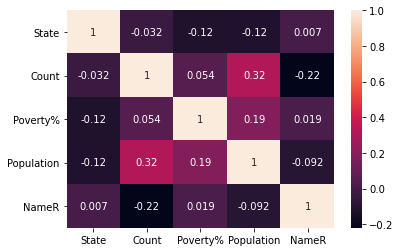

In [36]:
sns.heatmap(Cancer2.corr(), annot=True)

## McNemar Chi-Square Python

### Does Poverty effect the number of Cancer Cases?

Text(0, 0.5, 'Count')

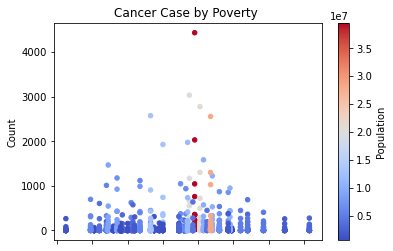

In [37]:
Plot = Cancer2.plot.scatter(x='Poverty%', y='Count', c='Population', cmap='coolwarm' )
Plot.set_title("Cancer Case by Poverty ")
Plot.set_xlabel("Poverty")
Plot.set_ylabel("Count")

### Test Assumptions and Run Analyses

In [38]:
result = sm.stats.contingency_tables.mcnemar(Cancer2_crosstab, exact=False, correction=True)
print(result)

pvalue      4.489784498638631e-06
statistic   21.043478260869566


##### It's significant - the p value is less than .05. 

## Visualizing Transformations

C:\Users\Aarons\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Poverty%', ylabel='Density'>

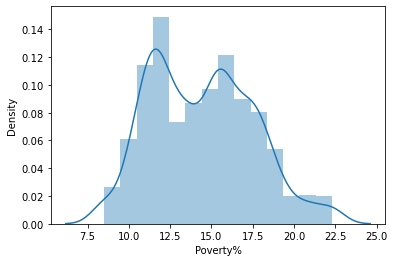

In [40]:
sns.distplot(Cancer2['Poverty%'])

C:\Users\Aarons\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Count', ylabel='Density'>

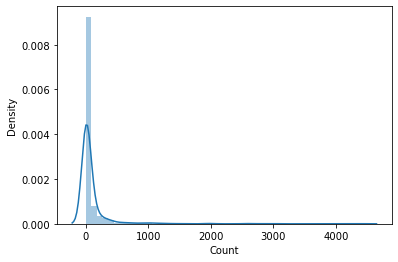

In [41]:
sns.distplot(Cancer2['Count'])

C:\Users\Aarons\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Population', ylabel='Density'>

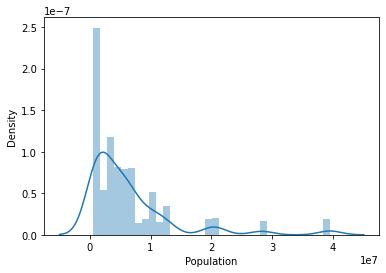

In [42]:
sns.distplot(Cancer2['Population'])

### Transforming Positively Skewed Data

In [43]:
Cancer2['CountSQRT'] = np.sqrt(Cancer2['Count'])

In [44]:
Cancer2['PopulationSQRT'] = np.sqrt(Cancer2['Population'])

### Using np.log()

In [45]:
Cancer2['CountLOG'] = np.log(Cancer2['Count'])

C:\Users\Aarons\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [46]:
Cancer2['PopulationLOG'] = np.log(Cancer2['Population'])

### Dealing with Infinite Data

In [47]:
Cancer2.dropna(inplace=True)

<AxesSubplot:>

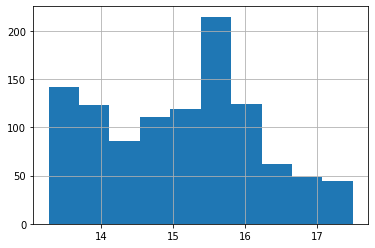

In [49]:
Cancer2.PopulationLOG.hist()

<AxesSubplot:>

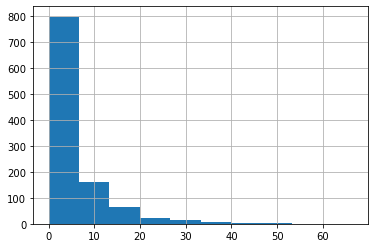

In [50]:
Cancer2.CountSQRT.hist()